<div style="font-size:18pt; padding-top:20px; text-align:center; line-height: 1.5;">СЕМИНАР 5. <b>Оптимизация. Часть 2.</b> Исследование влияния значения коэффициента альфа в стохастическом градиентном спуске</div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

In [1]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

In [2]:
np.random.seed(100)
w1 = 0.5 * np.random.randn(1000) + 1
w2 = 0.5 * np.random.randn(1000) + 0.5
#w2 = 10 * np.random.randn(1000) + 30

y = 0.5 * np.random.randn(1000)

In [3]:
# Количество элементов в выборке
n = len(y)

# Функция потерь (ошибки)  
f = lambda w1, w2, x1, x2: 1 / n * sum([(w1[i]*x1 + w2[i]*x2 - y[i]) ** 2 for i in range(n)])

In [4]:
coord_x1 = np.arange(-4, 5, 0.1) #Значения x c шагом 0.1
coord_x2 = np.arange(-4, 5, 0.1) #Значения x c шагом 0.1

x1, x2 = np.meshgrid(coord_x1, coord_x2)

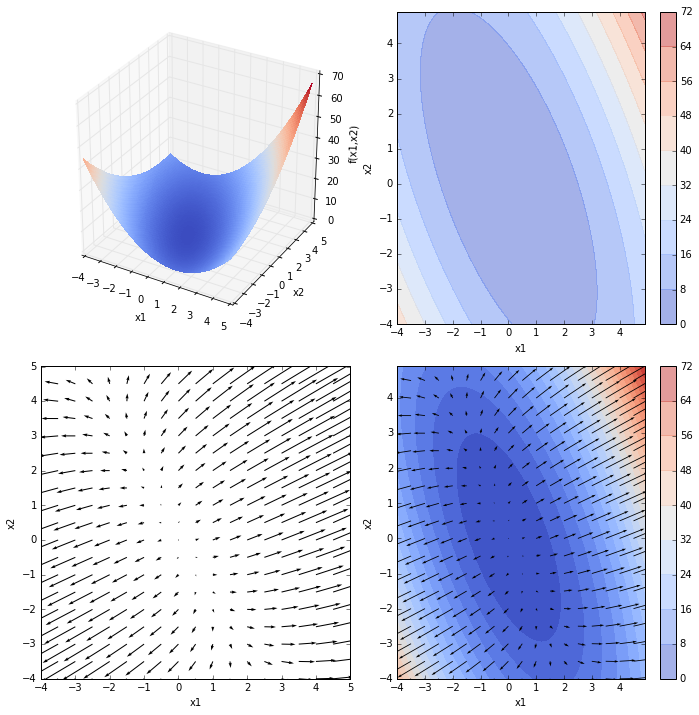

In [5]:
fig = plt.figure(1, figsize=(10, 10))

ax0 = fig.add_subplot(2, 2, 1, projection="3d")
ax0.plot_surface(x1, x2, f(w1, w2, x1, x2), rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax0.set_xlabel("x1")
ax0.set_ylabel("x2")
ax0.set_zlabel("f(x1,x2)")

ax1 = plt.subplot(2,2,2)
cf = ax1.contourf(x1, x2, f(w1, w2, x1, x2), 10, alpha=0.5, cmap=cm.coolwarm)
plt.colorbar(cf)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")

ax2 = plt.subplot(2,2,3)
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")

X, Y = np.meshgrid(coord_x1[::5], coord_x2[::5])
Fxy = f(w1, w2, X, Y)
dX = coord_x1[5] - coord_x1[0]
dY = coord_x2[5] - coord_x2[0]
dFY,dFX = np.gradient(Fxy, dX, dY)

ax2.quiver(X, Y, dFX, dFY, scale=100)

ax3 = plt.subplot(2,2,4)
ax3.set_xlabel("x1")
ax3.set_ylabel("x2")
ax3.contourf(x1, x2, f(w1, w2, x1, x2), 25, cmap=cm.coolwarm)
ax3.quiver(X, Y, dFX, dFY, scale=100)
plt.colorbar(cf)

plt.tight_layout()

plt.show()

In [6]:
def plotCurrentPoint(x_curr, x_prev, f_curr, f_prev):
    if abs(x_curr - x_prev) > 0.001 and abs(f_curr - f_prev) > 0.001:
        plt.annotate("", xy=(x_prev, f_prev), xytext=(x_curr, f_curr), arrowprops=dict(arrowstyle="<-", color="grey",  
                                                                                   linestyle ="dashed"))
    plt.plot(x_curr, f_curr, 'o', color = "blue")
    
def plotStartEndPosition(x_curr, x_st, f_curr, f_st):
    plt.annotate("", xy=(x_st,f_st), xytext=(x_curr, f_curr), arrowprops=dict(arrowstyle="<-", color="red"))

<p>Градиентный спуск</p>

In [7]:
df_x1 = lambda w1, w2, x1, x2: 2*sum(w1[i]*(w1[i]*x1 + w2[i]*x2 - y[i]) for i in range(n)) #Производная по x
df_x2 = lambda w1, w2, x1, x2: 2*sum(w2[i]*(w1[i]*x1 + w2[i]*x2 - y[i]) for i in range(n)) #Производная по y

In [8]:
def gradientDescent2D(w1, w2, alpha, f, dfx1, dfx2, iterNum, err, startX1, startX2):
    
    x1_min = startX1
    x1_min_prev = startX1
    
    x2_min = startX2
    x2_min_prev = startX2
    
    y_prev = f(w1, w2, x1_min, x2_min)
    y_cur = y_prev
    
    i = 0

    
    while i < iterNum:
        
        x1_min = x1_min_prev - alpha * dfx1(w1, w2, x1_min_prev, x2_min_prev)
        x2_min = x2_min_prev - alpha * dfx2(w1, w2, x1_min_prev, x2_min_prev)
        
        y_cur = f(w1, w2, x1_min, x2_min)
        
        if abs(y_cur - y_prev) <= err:
            break
        
        y_prev = y_cur
        
        plotCurrentPoint(x1_min, x1_min_prev, x2_min, x2_min_prev)
        #plt.plot(x_min, y_min, 'o', color = "blue")
        
        x1_min_prev = x1_min
        x2_min_prev = x2_min

        i += 1
        
    return (x1_min, x2_min, i)

In [9]:
alpha = 0.0005
iterNum = 200
err = 0.0001
startX1 = 4
startX2 = -2

(0.01870049670906411, 0.013059770122860017, 17)

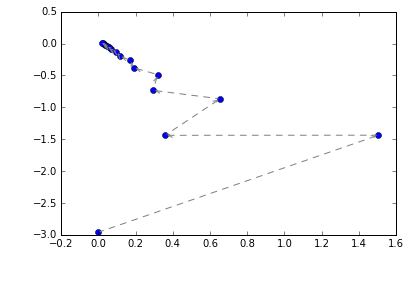

In [10]:
gradientDescent2D(w1, w2, alpha, f, df_x1, df_x2, iterNum, err, startX1, startX2)

<p>Стохастический градиентный спуск</p>

In [11]:
# Количество элементов в выборке
n = len(y)

# Функция потерь (ошибки)  
f = lambda w1, w2, x1, x2: 1 / n * sum([(w1[i]*x1 + w2[i]*x2 - y[i]) ** 2 for i in range(n)])

# Частные производные от функции потерь
df_x1_i = lambda w1, w2, x1, x2, i:1/2.0 * w1[i] * (w1[i]*x1 + w2[i]*x2 - y[i])
df_x2_i = lambda w1, w2, x1, x2, i: 1/2.0 *w2[i] * (w1[i]*x1 + w2[i]*x2 - y[i])

In [12]:
def stochasticGradientDescent2D(w1, w2, alpha, f, dfx1i, dfx2i, err, startX1, startX2):
    
    n = len(y)
    
    x1_min = startX1
    x1_min_prev = startX1
    
    x2_min = startX2
    x2_min_prev = startX2
    
    y_prev = f(w1, w2, x1_min, x2_min)
    y_cur = y_prev
    
    j = 0
    
    for i in range(n):
        
        x1_min = x1_min_prev - alpha * dfx1i(w1, w2, x1_min_prev, x2_min_prev, i)
        x2_min = x2_min_prev - alpha * dfx2i(w1, w2, x1_min_prev, x2_min_prev, i)
        
        
        y_cur = f(w1, w2, x1_min, x2_min)
        
        if abs(y_cur - y_prev) <= err:
            break
        
        y_prev = y_cur    
        
        plotCurrentPoint(x1_min, x1_min_prev, x2_min, x2_min_prev)
        
        x1_min_prev = x1_min
        x2_min_prev = x2_min

        j += 1
                     
    return (x1_min, x2_min, j)

In [13]:
alpha = 0.05
iterNum = 200
err = 0.0001
startX1 = 4
startX2 = -2

(1.7353519570127289, -2.3167146790733288, 45)

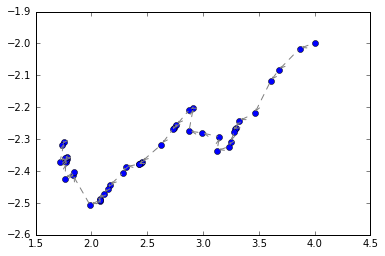

In [14]:
stochasticGradientDescent2D(w1, w2, alpha, f, df_x1_i, df_x2_i, err, startX1, startX2)

<p>Исследование влияения значения коэффициента альфа</p>

In [15]:
def plotInit2D(x1, x2, w1, w2, f, startX, startY):
    plt.contourf(x1, x2, f(w1, w2, x1, x2), 10, alpha=0.5, cmap=cm.coolwarm)
    #plt.colorbar(cf)
    plt.grid(True)
    plt.plot(startX, startY, 'o', color = "green")   

def plotEndState2D(x_min, y_min, f_min, alpha, startX, startY, numI):
    plt.plot(x_min, y_min, 'o', color = "red")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("$\\alpha = " + str(alpha) + "$, Start Point: $x_{1,0} = " + str(startX) + "$, $x_{2,0} = " + str(startY) +"$" )
    text = "Number of iterations: "+str(numI) + "\n $x_{1,min} = " + \
        str(np.around(x_min, decimals = 2)) +"$, $x_{2,min} = " + str(np.around(y_min, decimals = 2)) +"$ \n" + \
        "$f(x_{1,min}, x_{2,min}) = " + str(np.around(f_min, decimals = 4)) + "$"
    plt.annotate(text, (0.10, 0.80), xytext=(0.10, 0.75), textcoords="axes fraction", size=14)
    
def plotGraphics2D(st_x, st_y, maxIter, err, f, dfx, dfy, x, y, w1, w2, z, alphas, grType=0):
    
    numPlt = len(alphas)
    numClmns = 2
    numRows = np.ceil(numPlt / numClmns)

    plt.figure(2, figsize=(numClmns*5, numRows*5))
    
    def plotOneGraphic(grNum, alpha):
        plt.subplot(numRows, numClmns,grNum+1)
        plotInit2D(x, y, w1, w2, f, st_x, st_y)
        x_min, y_min, numI = 0, 0, 0
        if grType == 1:
            x_min, y_min, numI = stochasticGradientDescent2D(w1, w2, alpha, f, dfx, dfy, err, st_x, st_y)
        else:
            x_min, y_min, numI = gradientDescent2D(w1, w2, alpha, f, dfx, dfy, maxIter, err, st_x, st_y)
            
        plotEndState2D(x_min, y_min, f(w1, w2, x_min, y_min), alpha, st_x, st_y, numI)
        plotStartEndPosition(x_min, st_x, y_min, st_y)
        return (x_min, y_min)

    
    return [plotOneGraphic(i, alphas[i]) for i in range(numPlt)]

<p>Градиентный спуск и альфа</p>

<p><b><i>Начальная точка 1</i></b></p>

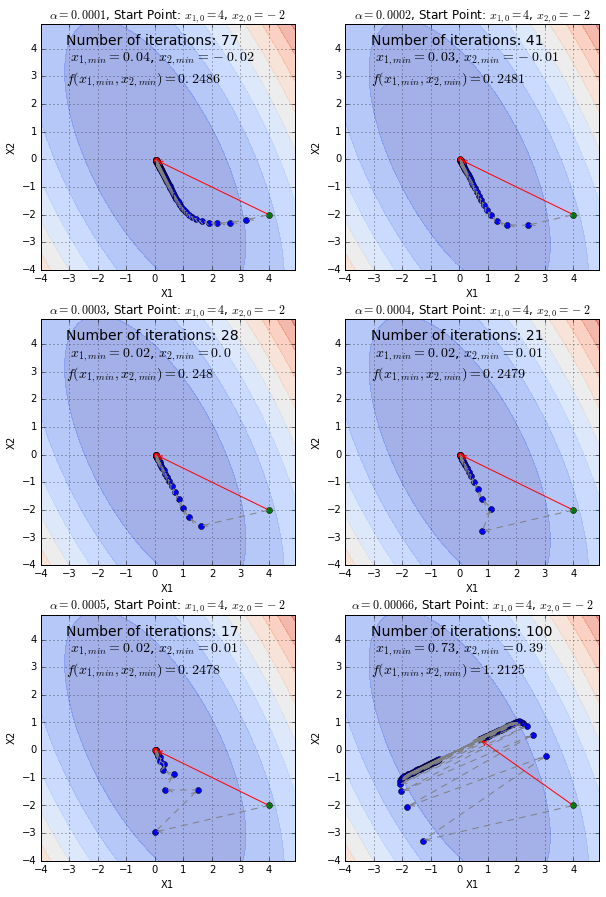

In [16]:
startX1 = 4
startX2 = -2
maxIter = 100
err = 0.0001
alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.00066]

res = plotGraphics2D(startX1, startX2, maxIter, err, f, df_x1, df_x2, x1, x2, w1, w2, y, alphas)

<p><b><i>Начальная точка 2</i></b></p>

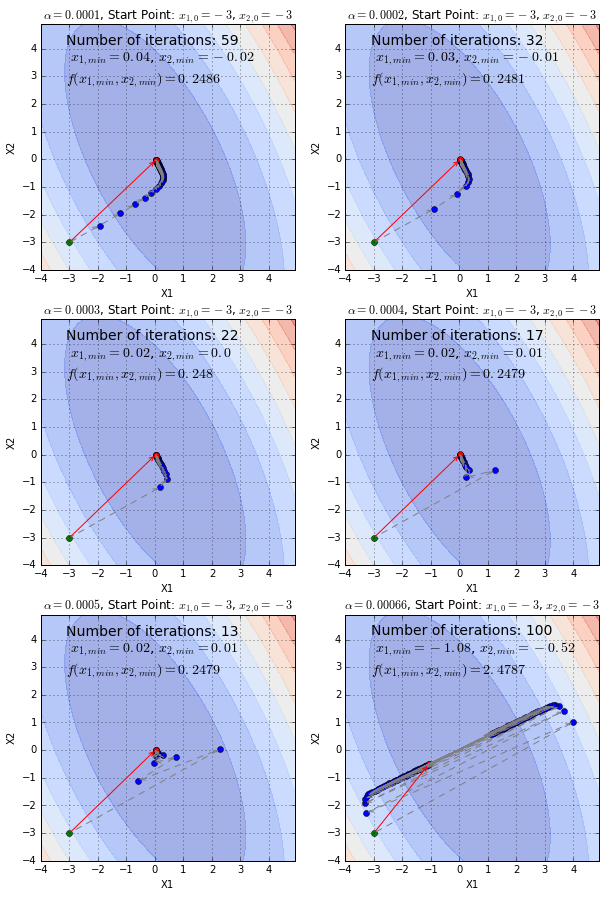

In [17]:
startX1 = -3
startX2 = -3
maxIter = 100
err = 0.0001
alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.00066]

res = plotGraphics2D(startX1, startX2, maxIter, err, f, df_x1, df_x2, x1, x2, w1, w2, y, alphas)

<p>Стохастический градиентный спуск и альфа</p>

<p><b><i>Начальная точка 1</i></b></p>

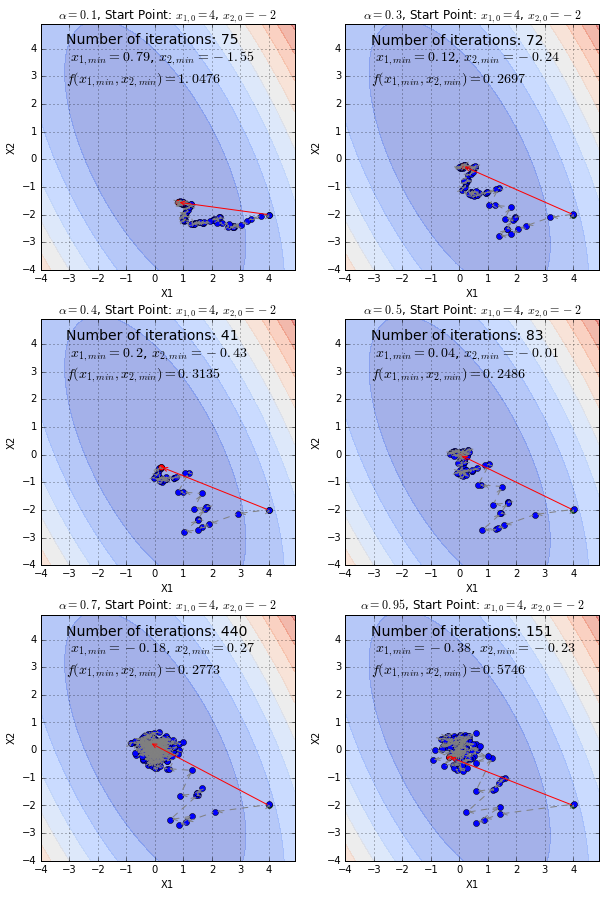

In [18]:
startX1 = 4
startX2 = -2
err = 0.0001
alphas =  [0.1, 0.3, 0.4, 0.5, 0.7, 0.95]

res = plotGraphics2D(startX1, startX2, maxIter, err, f, df_x1_i, df_x2_i, x1, x2, w1, w2, y, alphas, grType=1)

<p><b><i>Начальная точка 2</i></b></p>

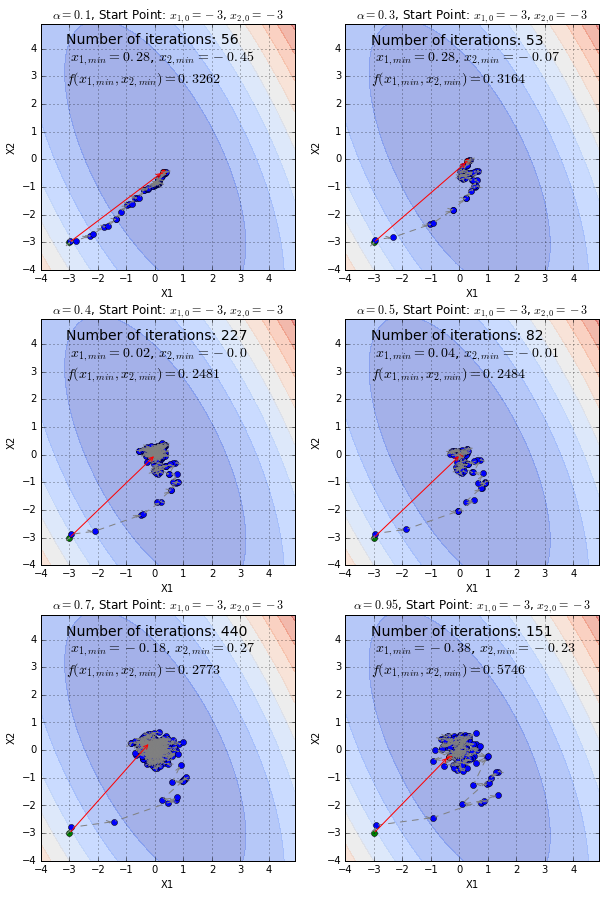

In [19]:
startX1 = -3
startX2 = -3
err = 0.0001
alphas =  [0.1, 0.3, 0.4, 0.5, 0.7, 0.95]

res = plotGraphics2D(startX1, startX2, maxIter, err, f, df_x1_i, df_x2_i, x1, x2, w1, w2, y, alphas, grType=1)

<p>МНК</p>

In [20]:
X = np.asmatrix(np.c_[w1, w2])
X[:5,:2]

matrix([[ 0.12511726,  0.39456632],
        [ 1.1713402 ,  0.16154242],
        [ 1.5765179 ,  0.56755889],
        [ 0.87378198,  0.41787348],
        [ 1.49066039,  1.04986026]])

In [21]:
yy = np.asmatrix(y.reshape(len(y), 1))
yy[:5]

matrix([[-0.02871674],
        [-0.26225853],
        [ 0.19488076],
        [-0.94576159],
        [-0.71132665]])

In [22]:
xx = np.linalg.lstsq(X, yy)[0]
xx

matrix([[ 0.0112711 ],
        [ 0.02789776]])

In [23]:
f(w1, w2, xx[0,0], xx[1,0])

0.24776270862335126

<p>Оценка время выполнения алгоритмов градиентного спуска</p>

In [24]:
def gradientDescent2D_Lite(w1, w2, alpha, f, dfx1, dfx2, iterNum, startX1, startX2):
    
    x1_min = startX1
    x1_min_prev = startX1
    
    x2_min = startX2
    x2_min_prev = startX2
    
    i = 0
    stop = False
    
    while i < iterNum and not stop:
        
        x1_min = x1_min_prev - alpha * dfx1(w1, w2, x1_min_prev, x2_min_prev)
        x2_min = x2_min_prev - alpha * dfx2(w1, w2, x1_min_prev, x2_min_prev)
        
        #if abs(f(w1, w2, x1_min, x2_min) - f(w1, w2, x1_min_prev, x2_min_prev)) <= err:
        #    stop = True

        #plotCurrentPoint(x1_min, x1_min_prev, x2_min, x2_min_prev)
        #plt.plot(x_min, y_min, 'o', color = "blue")
        
        x1_min_prev = x1_min
        x2_min_prev = x2_min

        i += 1
        
    return (x1_min, x2_min, i)

In [25]:
alpha = 0.0005
iterNum = 200
startX1 = 4
startX2 = -2

In [26]:
%timeit gradientDescent2D_Lite(w1, w2, alpha, f, df_x1, df_x2, iterNum, startX1, startX2)

1 loop, best of 3: 657 ms per loop


In [27]:
def stochasticGradientDescent2D_Lite(w1, w2, alpha, f, dfx1i, dfx2i, startX1, startX2):
    
    n = len(y)
    
    x1_min = startX1
    x1_min_prev = startX1
    
    x2_min = startX2
    x2_min_prev = startX2
    
    j = 0
    
    for i in range(n):
        
        x1_min = x1_min_prev - alpha * dfx1i(w1, w2, x1_min_prev, x2_min_prev, i)
        x2_min = x2_min_prev - alpha * dfx2i(w1, w2, x1_min_prev, x2_min_prev, i)
        
        #if abs(f(w1, w2, x1_min, x2_min) - f(w1, w2, x1_min_prev, x2_min_prev)) <= err:
        #    break

        #plotCurrentPoint(x1_min, x1_min_prev, x2_min, x2_min_prev)
        
        x1_min_prev = x1_min
        x2_min_prev = x2_min

        j += 1
                     
    return (x1_min, x2_min, j)

In [28]:
alpha = 0.5
startX1 = 4
startX2 = -2

In [29]:
%timeit stochasticGradientDescent2D_Lite(w1, w2, alpha, f, df_x1_i, df_x2_i, startX1, startX2)

100 loops, best of 3: 3.98 ms per loop
